In [1]:
from keras.models import model_from_json
from inception_resnet_v1 import *
import numpy as np

from keras.models import Sequential
from keras.models import load_model
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input

import matplotlib.pyplot as plt
from keras.preprocessing import image

import pathlib
import pandas as pd

def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(160, 160))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

model = InceptionResNetV1()

In [2]:
# #facenet model structure: https://github.com/serengil/tensorflow-101/blob/master/model/facenet_model.json
# model = model_from_json(open(r"D:\self\university\workshop\project\data\facenet\facenet_model.json", "r").read())
 
# #pre-trained weights https://drive.google.com/file/d/1971Xk5RwedbudGgTIrGAL4F7Aifu7id1/view?usp=sharing
# model.load_weights(r'D:\self\university\workshop\project\data\facenet\facenet_weights.h5')
 
# model.summary()

In [3]:
# from inception_resnet_v1 import *
# model = InceptionResNetV1()

In [4]:
# import numpy as np
# def l2_normalize(x):
#     return x / np.sqrt(np.sum(np.multiply(x, x)))

In [5]:
# def findEuclideanDistance(source_representation, test_representation):
#     euclidean_distance = source_representation - test_representation
#     euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
#     euclidean_distance = np.sqrt(euclidean_distance)
#     return euclidean_distance

In [6]:
import numpy as np

from keras.models import Sequential
from keras.models import load_model
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input

import matplotlib.pyplot as plt
from keras.preprocessing import image

In [7]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(160, 160))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [8]:
# img1_representation = l2_normalize(model.predict(preprocess_image(r"D:\self\university\workshop\project\data\AFDB\AFDB_face_dataset\AFDB_face_dataset\aidai\0_0_aidai_0014.jpg"))[0,:])
# img2_representation = l2_normalize(model.predict(preprocess_image(r"D:\self\university\workshop\project\data\AFDB\AFDB_masked_face_dataset\AFDB_masked_face_dataset\aidai\0_0_0.jpg"))[0,:])
 
# euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
# threshold = 0.35
# if euclidean_distance < threshold:
#     print("verified... they are same person")
# else:
#     print("unverified! they are not same person!")

In [9]:
import pathlib

SAMPLE_SIZE = 10
BASE_PATH = pathlib.Path('../data/AFDB')
threshold = 0.4

unmasked_dataset_path = BASE_PATH / 'AFDB_face_dataset' / 'AFDB_face_dataset'
masked_dataset_path = BASE_PATH / 'AFDB_masked_face_dataset' / 'AFDB_masked_face_dataset'

In [10]:
results = []


unmasked_people = sorted(list(unmasked_dataset_path.iterdir()))
for unmasked_person in unmasked_people:
    masked_person = masked_dataset_path / unmasked_person.name
    if not masked_person.is_dir():
        continue
    unmasked_image_path = str(sorted(list(unmasked_person.iterdir()))[0])
    masked_image_path = str(sorted(list(masked_person.iterdir()))[0])
    
    try:
        unmasked_features = l2_normalize(model.predict(preprocess_image(unmasked_image_path)))
        masked_features = l2_normalize(model.predict(preprocess_image(masked_image_path)))

        euclidean_distance = findEuclideanDistance(unmasked_features, masked_features)
        matched = euclidean_distance < threshold
        if matched:
            print("verified... they are same person")
        else:
            print("unverified! they are not same person!")
    except Exception as e:
        print(e)
        continue
    
    results.append([unmasked_person.name, matched, euclidean_distance])

verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same pe

verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person


In [11]:
len([x for x in results if x[1]])

351

In [12]:
results_neg = []

unmasked_faces = []
masked_faces = []
unmasked_people = sorted(list(unmasked_dataset_path.iterdir()))
for unmasked_person in unmasked_people:
    masked_person = masked_dataset_path / unmasked_person.name
    if not masked_person.is_dir():
        continue
    unmasked_image_path = sorted(list(unmasked_person.iterdir()))[0]
    masked_image_path = sorted(list(masked_person.iterdir()))[0]
    unmasked_faces.append(unmasked_image_path)
    masked_faces.append(masked_image_path)
    
for unmasked_image_path, masked_image_path in zip(unmasked_faces, masked_faces[1:]):
    try:
        unmasked_features = l2_normalize(model.predict(preprocess_image(str(unmasked_image_path))))
        masked_features = l2_normalize(model.predict(preprocess_image(str(masked_image_path))))

        euclidean_distance = findEuclideanDistance(unmasked_features, masked_features)
        matched = euclidean_distance < threshold
        if matched:
            print("verified... they are same person")
        else:
            print("unverified! they are not same person!")
    except Exception as e:
        print(e)
        continue
    
    results_neg.append([(unmasked_image_path.parent.name, masked_image_path.parent.name), matched, euclidean_distance])

verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same pe

verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
unverified! they are not same person!
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verified... they are same person
verif

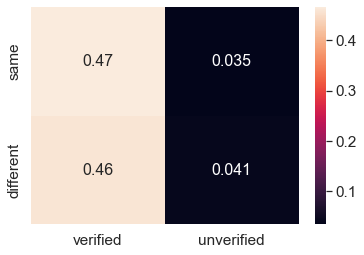

In [13]:
TP=len([x for x in results if x[1]]) / (len(results) + len(results_neg))
FN=len([x for x in results if not x[1]]) / (len(results) + len(results_neg))
FP=len([x for x in results_neg if x[1]]) / (len(results) + len(results_neg))
TN=len([x for x in results_neg if not x[1]]) / (len(results) + len(results_neg))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['same', 'different'], ['verified', 'unverified'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [14]:
from sklearn import svm
X = [x[2] for x in results] + [x[2] for x in results_neg]
y = [1 for x in results] + [0 for x in results_neg]
clf = svm.SVC() #kernel="linear")
clf.fit(np.array(X).reshape(-1, 1), y)

SVC()

In [15]:
ps=clf.predict(np.array([x[2] for x in results]).reshape(-1, 1))
ns=clf.predict(np.array([x[2] for x in results_neg]).reshape(-1, 1))

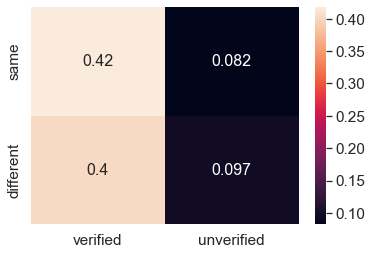

In [16]:
TP=len([x for x in ps if x]) / (len(results) + len(results_neg))
FN=len([x for x in ps if not x]) / (len(results) + len(results_neg))
FP=len([x for x in ns if x]) / (len(results) + len(results_neg))
TN=len([x for x in ns if not x]) / (len(results) + len(results_neg))
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TP,FN],
         [FP,TN]]

df_cm = pd.DataFrame(array, ['same', 'different'], ['verified', 'unverified'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [18]:
import seaborn as sns

In [41]:
total_results = pd.DataFrame(data=[(x[2],"positive") for x in results]+[(x[2],"negative") for x in results_neg], columns=["distance", "type"])

In [44]:
total_results.tail()

,distance,type
748,0.186026,negative
749,0.272082,negative
750,0.193702,negative
751,0.196686,negative
752,0.150928,negative


<AxesSubplot:xlabel='distance', ylabel='Percent'>

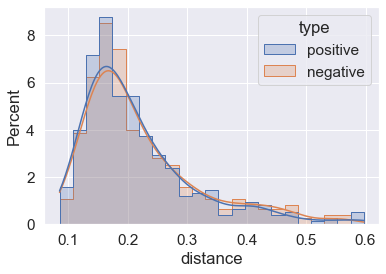

In [47]:
sns.histplot(total_results, x='distance', hue='type', element='step', kde=True, stat='percent')